In [1]:
from enum import unique

from ucimlrepo import fetch_ucirepo
import os
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from collections import Counter
import pandas as pd
# from ipynb.fs.full.id3_tests import reassign_classes
def reassign_classes(y: np.ndarray) -> np.ndarray:
    new_y = []
    for current_class in y:
        if current_class > 5:
            new_y.append(1)
        else:
            new_y.append(0)
    return new_y
path_to_save = os.getcwd()
path_to_save = path_to_save[:-11]
path_to_save = path_to_save+"data\\"
print(path_to_save)

C:\Users\janpo\PycharmProjects\UMA\experimedata\


In [220]:
# START OF WINE SECTION
# X:
# 0. FIXED_ACIDITY
# 1. VOLATILE_ACIDITY
# 2. CITRIC_ACID
# 3. RESIDUAL_SUGAR
# 4. CHLORIDES
# 5. FREE_SULFUR_DIOXIDE
# 6. TOTAL_SULFUR_DIOXIDE
# 7. DENSITY
# 8. PH
# 9. SULPHATES
# 10. ALCOHOL
# y - classes: 0 - below 6 ; 1 - over 5


In [221]:
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = np.array(wine_quality.data.features)
y = np.array(wine_quality.data.targets.quality)
y = reassign_classes(y)

In [222]:
ranges = np.zeros([11,2])
for i in range(X.shape[1]):
    ranges[i,0] = min(X[:,i])
    ranges[i,1] = max(X[:,i])
    print(f" Values for {i}. min {min(X[:,i])} , max: {max(X[:,i])}")
#print(ranges)
# print(X[:,0])

 Values for 0. min 3.8 , max: 15.9
 Values for 1. min 0.08 , max: 1.58
 Values for 2. min 0.0 , max: 1.66
 Values for 3. min 0.6 , max: 65.8
 Values for 4. min 0.009 , max: 0.611
 Values for 5. min 1.0 , max: 289.0
 Values for 6. min 6.0 , max: 440.0
 Values for 7. min 0.98711 , max: 1.03898
 Values for 8. min 2.72 , max: 4.01
 Values for 9. min 0.22 , max: 2.0
 Values for 10. min 8.0 , max: 14.9


In [223]:
def show_wine_data_scattering(number_of_sections):
    for i in range(X.shape[1]):
        labels = []
        values = []
        [mini, maxi] = ranges[i,:]
        step = (maxi - mini) / number_of_sections
        for k in range(number_of_sections):
            labels.append(f"{(mini+k*step):.3f}")
            values.append(sum(1 for x in X[:,i] if x <= mini+k*step))
        # print(values)
        for j in range(len(values)-1):
            values[len(values)-1-j] = values[len(values)-1-j] - values[len(values)-2-j]
        # print(labels)
        # print(values)
        label_step = len(labels)//5
        act_labels = [" "*t for t in range(len(labels))]
        for t in range(5):
            act_labels[t*label_step] = labels[t*label_step]
        act_labels[-1] = f"{(ranges[i,1]):.3f}"
        plt.bar(act_labels, values)
        plt.title(f'{i}.')
        plt.xlabel('Ranges')
        plt.ylabel('Count')
        plt.show()

In [228]:
# ####### SAVING FILE
# np.savetxt("../data_processed/wine/simple_processing/X.csv", X,
#               delimiter = ",")
# np.savetxt("../data_processed/wine/simple_processing/y.csv", y,
#               delimiter = ",")

In [230]:
# X = np.genfromtxt("../data_processed/wine/simple_processing/X.csv",
#                    delimiter=",",
#                    dtype=None,
#                    encoding="utf-8",
#                    names=None)

[[ 7.4     0.7     0.      1.9     0.076  11.     34.      0.9978  3.51
   0.56    9.4   ]
 [ 7.8     0.88    0.      2.6     0.098  25.     67.      0.9968  3.2
   0.68    9.8   ]]
[0, 0]


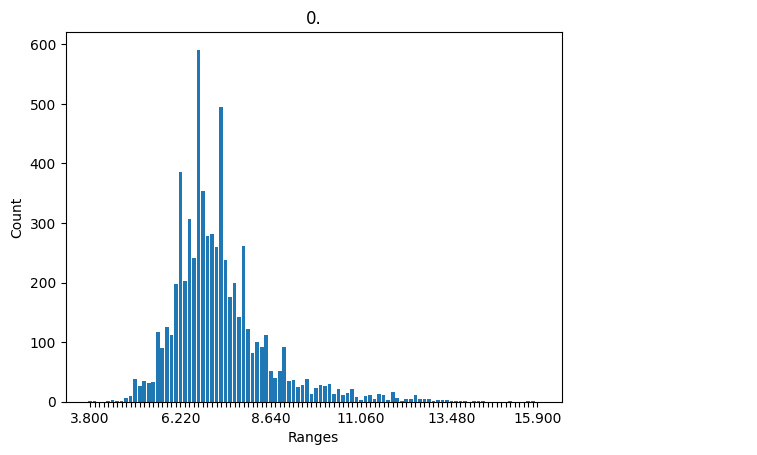

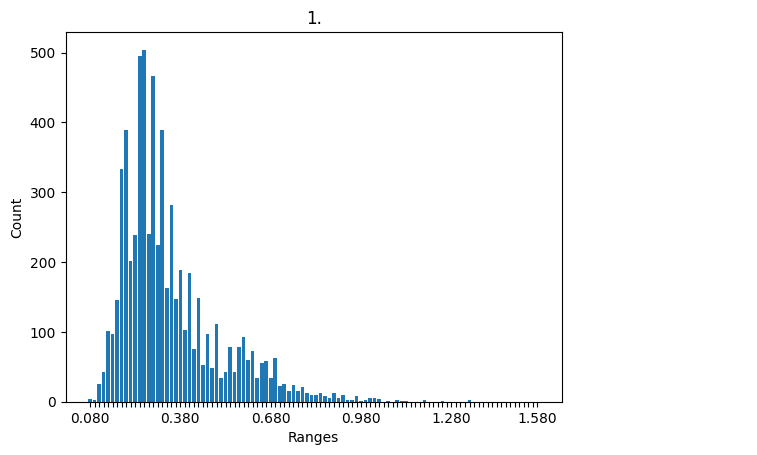

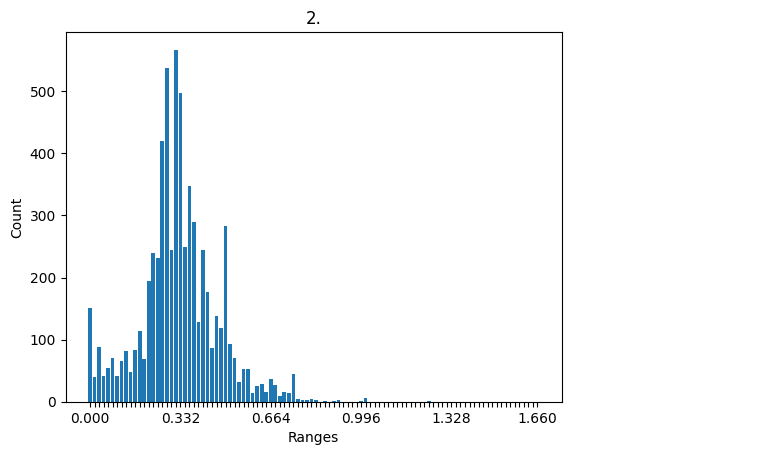

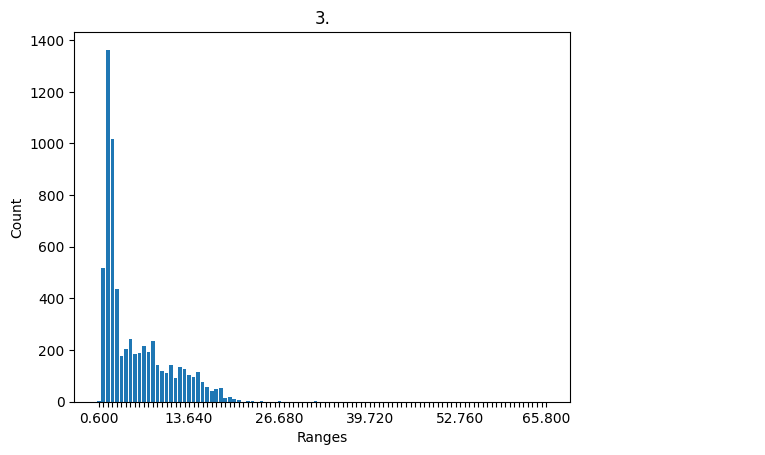

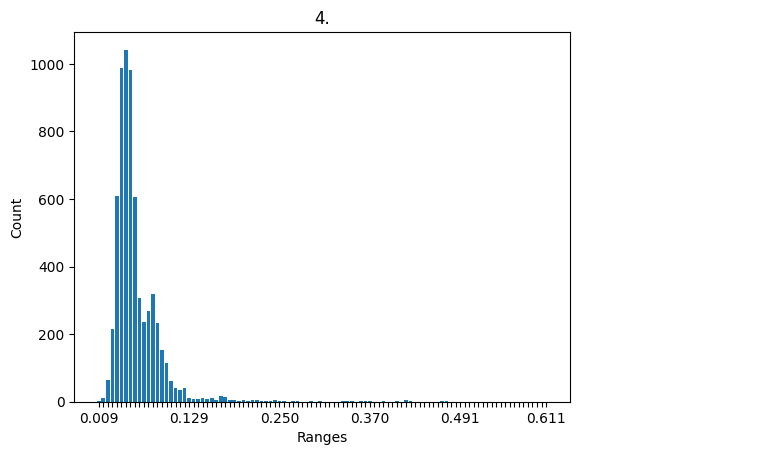

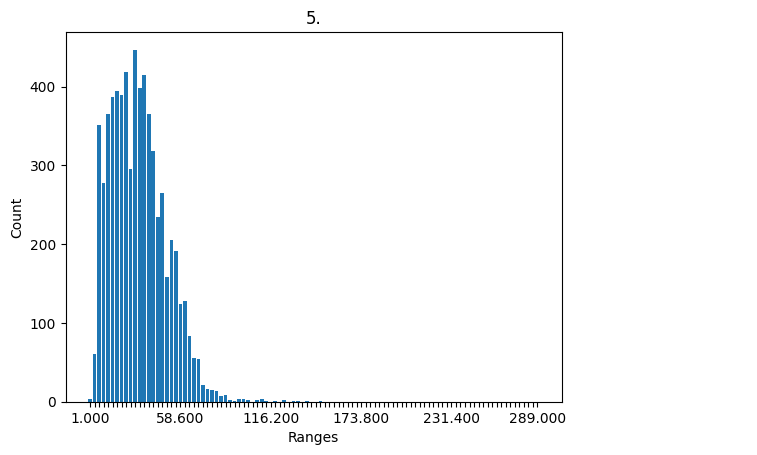

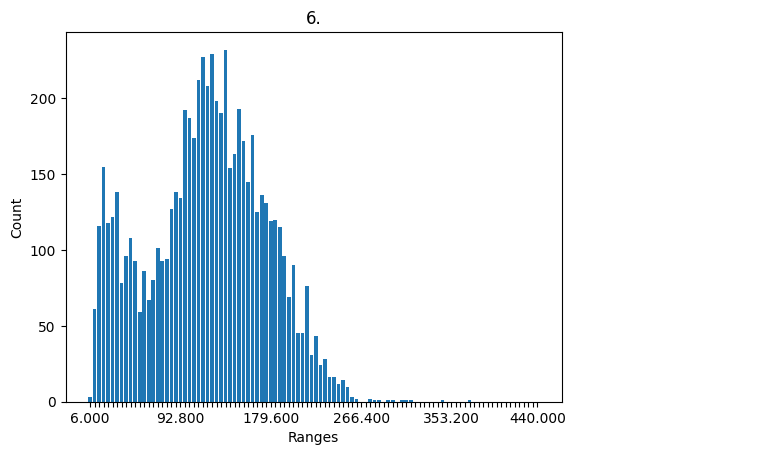

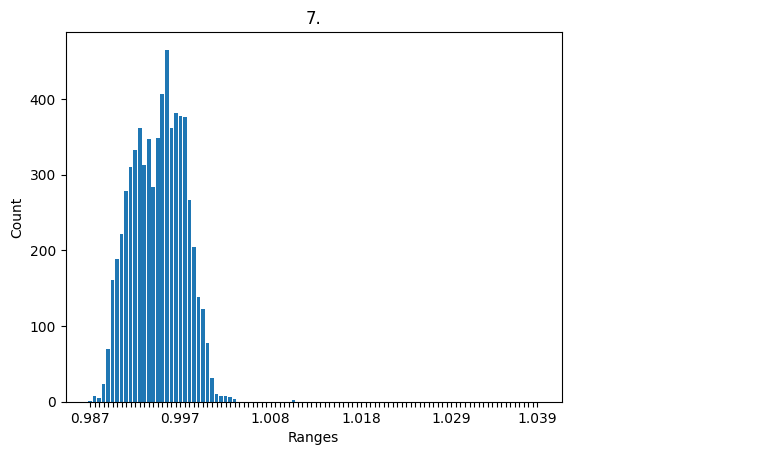

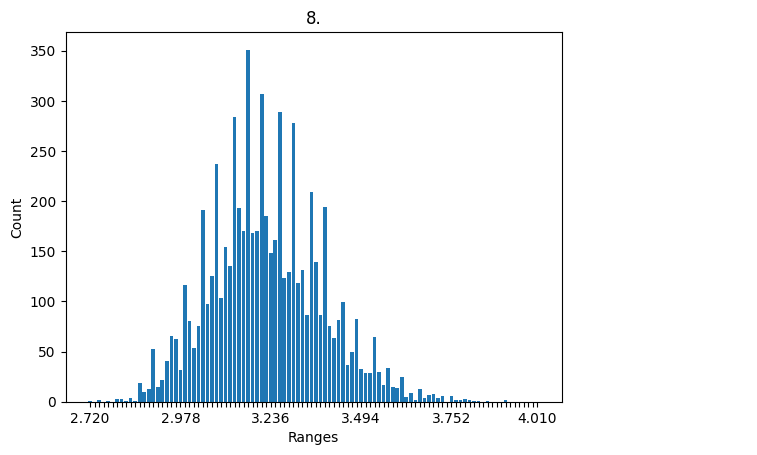

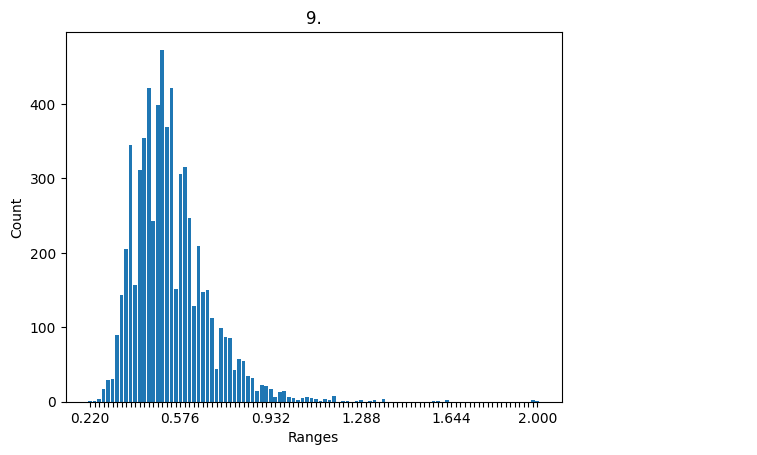

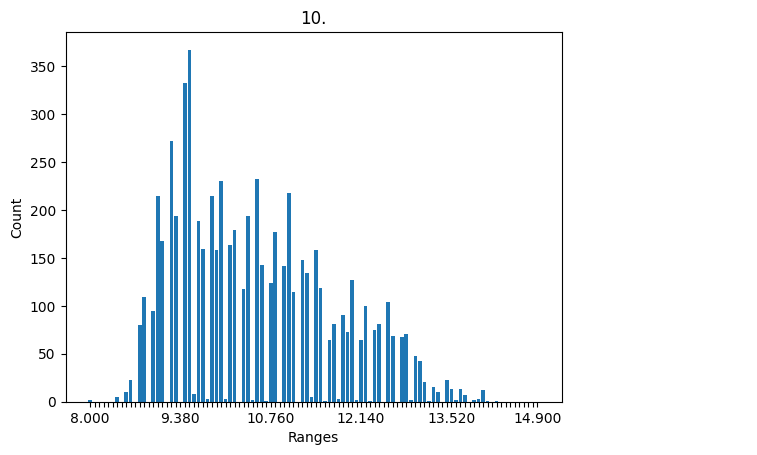

In [231]:
print(X[:2,:])
print(y[:2])
show_wine_data_scattering(100)

In [6]:
# START OF HEALTHCARE SECTION
# X1:
# 0. AGE
# 1. GENDER
# 2. BLOOD_TYPE
# 3. MEDICAL_CONDITION
# 4. INSURANCE_PROVIDER
# 5. BILLING_AMOUNT
# 6. ADMISSION_TYPE
# 7. MEDICATION
# 8. TIME_AT_HOSPITAL
# y - classes: 0 - abnormal ; 1 - normal ; 2 - inconclusive

In [7]:
data = pd.read_csv("../data/healthcare_dataset.csv")
data = np.array(data)
data_cut = np.array(data[:, :10])
# data_cut |age|gender|blood_type|medical_condition|insurance_provider|billing_amount|admission_type|medication|time_at_hospital|test_result|

# 0. AGE
data_cut[:,0] = data[:,1]
# 1. GENDER
data_cut[:,1] = data[:,2]
# 2. BLOOD_TYPE
data_cut[:,2] = data[:,3]
# 3. MEDICAL_CONDITION
data_cut[:,3] = data[:,4]
# 4. INSURANCE_PROVIDER
data_cut[:,4] = data[:,8]
# 5. BILLING_AMOUNT
d = data[:,9]
d[d<0] = 0
data_cut[:,5] = d
# 6. ADMISSION_TYPE
data_cut[:,6] = data[:,11]
# 7. MEDICATION
data_cut[:,7] = data[:,13]
# 8. TIME_AT_HOSPITAL
for i in range(data.shape[0]):
    time_in_days = datetime.strptime(data[i,12], "%Y-%m-%d") - datetime.strptime(data[i,5], "%Y-%m-%d")
    time_in_days = int(time_in_days.days)
    data_cut[i,8] = time_in_days

# 9. TEST_RESULT
data_cut[:,9] = data[:,14]

print(data_cut[:4,:])


[[30 'Male' 'B-' 'Cancer' 'Blue Cross' 18856.281305978155 'Urgent'
  'Paracetamol' 2 'Normal']
 [62 'Male' 'A+' 'Obesity' 'Medicare' 33643.327286577885 'Emergency'
  'Ibuprofen' 6 'Inconclusive']
 [76 'Female' 'A-' 'Obesity' 'Aetna' 27955.096078842456 'Emergency'
  'Aspirin' 15 'Normal']
 [28 'Female' 'O+' 'Diabetes' 'Medicare' 37909.78240987528 'Elective'
  'Ibuprofen' 30 'Abnormal']]


In [8]:
X1 = data_cut[:,:9]
y1 = data_cut[:,9]
y1[y1=="Abnormal"] = 0
y1[y1=="Normal"] = 1
y1[y1=="Inconclusive"] = 2


In [9]:
def show_healthcare_data_scattering(number_of_sections):
    i = 0
    [mini0, maxi0] = min(data_cut[:,0]), max(data_cut[:,0])
    labels = []
    values = []
    step = (maxi0 - mini0) / number_of_sections
    for k in range(number_of_sections):
        labels.append(f"{(mini0+k*step):.1f}")
        values.append(sum(1 for x in data_cut[:,0] if x <= mini0+k*step))
        # print(values)
    for j in range(len(values)-1):
        values[len(values)-1-j] = values[len(values)-1-j] - values[len(values)-2-j]
    # print(labels)
    # print(values)
    label_step = len(labels)//5
    act_labels = [" "*t for t in range(len(labels))]
    for t in range(5):
        act_labels[t*label_step] = labels[t*label_step]
    act_labels[-1] = f"{maxi0:.1f}"
    plt.bar(act_labels, values)
    plt.title(f'{i}.')
    plt.xlabel('Ranges')
    plt.ylabel('Count')
    plt.show()
    for i in range(1,5):
        [labels, values] = np.unique(data_cut[:,i], return_counts=True)
        plt.bar(labels, values)
        plt.title(f'{i}.')
        plt.xlabel('Ranges')
        plt.ylabel('Count')
        plt.show()
    i = 5
    [mini5, maxi5] = min(data_cut[:,5]), max(data_cut[:,5])
    labels = []
    values = []
    step = (maxi5 - mini5) / number_of_sections
    for k in range(number_of_sections):
        labels.append(f"{(mini5+k*step):.1f}")
        values.append(sum(1 for x in data_cut[:,5] if x <= mini5+k*step))
        # print(values)
    for j in range(len(values)-1):
        values[len(values)-1-j] = values[len(values)-1-j] - values[len(values)-2-j]
    # print(labels)
    # print(values)
    label_step = len(labels)//5
    act_labels = [" "*t for t in range(len(labels))]
    for t in range(5):
        act_labels[t*label_step] = labels[t*label_step]
    act_labels[-1] = f"{maxi5:.1f}"
    plt.bar(act_labels, values)
    plt.title(f'{i}.')
    plt.xlabel('Ranges')
    plt.ylabel('Count')
    plt.show()
    for i in range(6,8):
        [labels, values] = np.unique(data_cut[:,i], return_counts=True)
        plt.bar(labels, values)
        plt.title(f'{i}.')
        plt.xlabel('Ranges')
        plt.ylabel('Count')
        plt.show()
    i = 8
    [mini8, maxi8] = min(data_cut[:,8]), max(data_cut[:,8])
    labels = []
    values = []
    step = (maxi8 - mini8) / number_of_sections
    for k in range(number_of_sections):
        labels.append(f"{(mini8+k*step):.1f}")
        values.append(sum(1 for x in data_cut[:,8] if x <= mini8+k*step))
        # print(values)
    for j in range(len(values)-1):
        values[len(values)-1-j] = values[len(values)-1-j] - values[len(values)-2-j]
    # print(labels)
    # print(values)
    label_step = len(labels)//5
    act_labels = [" "*t for t in range(len(labels))]
    for t in range(5):
        act_labels[t*label_step] = labels[t*label_step]
    act_labels[-1] = f"{maxi8:.1f}"
    plt.bar(act_labels, values)
    plt.title(f'{i}.')
    plt.xlabel('Ranges')
    plt.ylabel('Count')
    plt.show()

In [10]:
# ####### SAVING FILE
# np.savetxt("../data_processed/healthcare/simple_processing/X.csv", X1,
#               delimiter = ",", fmt="%s")
# np.savetxt("../data_processed/healthcare/simple_processing/y.csv", y1,
#               delimiter = ",", fmt="%s")

In [169]:
# X1 = np.genfromtxt("../data_processed/healthcare/simple_processing/X.csv",
#                    delimiter=",",
#                    dtype=None,
#                    encoding="utf-8",
#                    names=None)

[[30 'Male' 'B-' 'Cancer' 'Blue Cross' 18856.281305978155 'Urgent'
  'Paracetamol' 2]
 [62 'Male' 'A+' 'Obesity' 'Medicare' 33643.327286577885 'Emergency'
  'Ibuprofen' 6]]
[1 2 1 0 0 1]


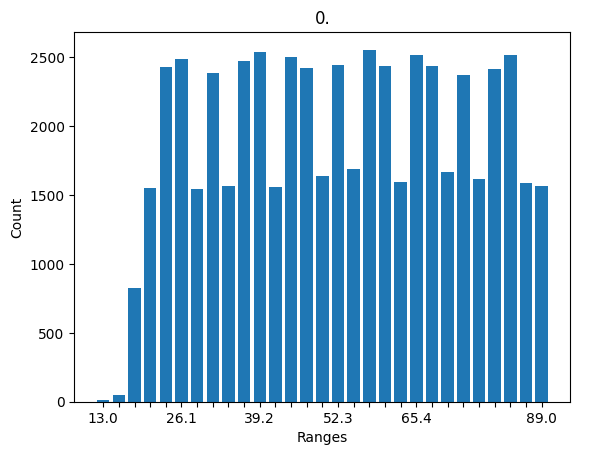

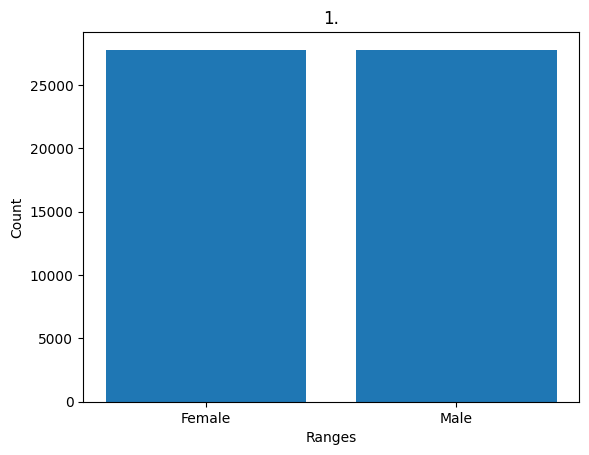

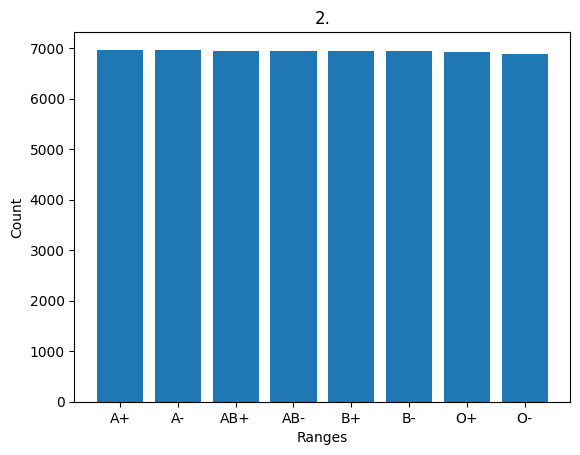

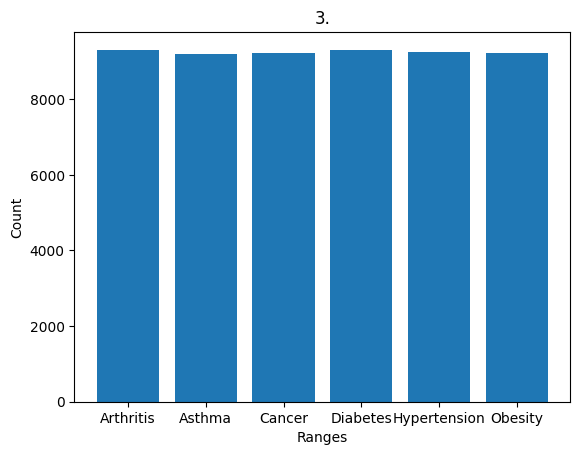

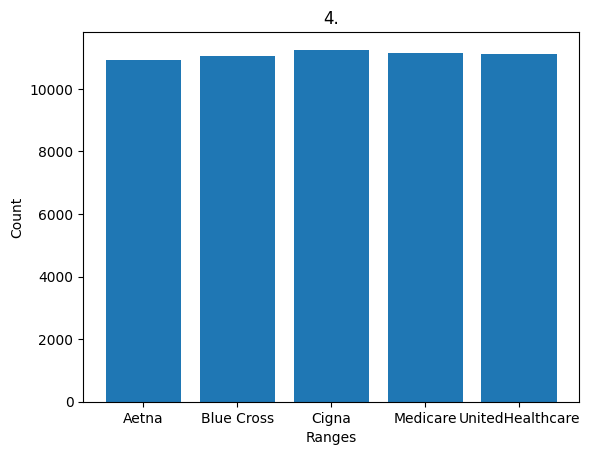

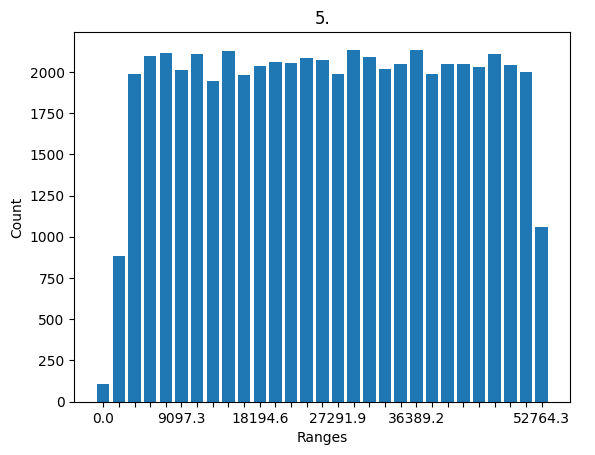

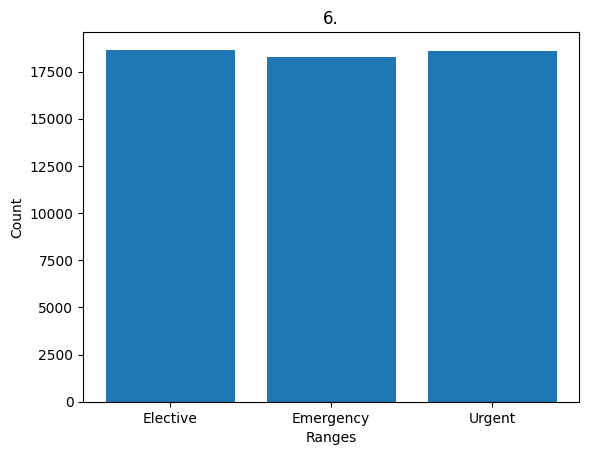

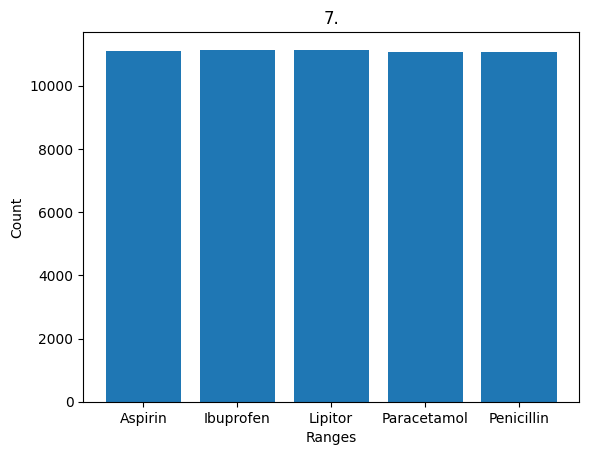

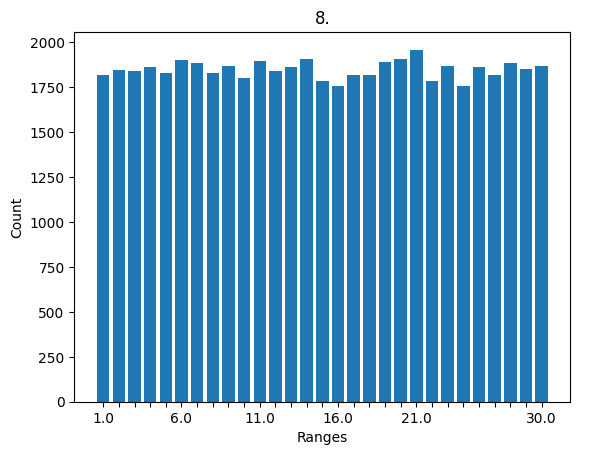

In [11]:
print(X1[:2,:])
print(y1[:6])
show_healthcare_data_scattering(29)

In [8]:
### HOT ONE ENCODING HEALTHCARE
# X1_H1:
# 0. AGE
# 1. GENDER : 0 - male, 1 - female
# 2. BLOOD_TYPE_A+
# 3. BLOOD_TYPE_A-
# 4. BLOOD_TYPE_AB+
# 5. BLOOD_TYPE_AB-
# 6. BLOOD_TYPE_B+
# 7. BLOOD_TYPE_B-
# 8. BLOOD_TYPE_O+
# 9. BLOOD_TYPE_O-
# 10. MEDICAL_CONDITION_ARTHRITIS
# 11. MEDICAL_CONDITION_ASTHMA
# 12. MEDICAL_CONDITION_CANCER
# 13. MEDICAL_CONDITION_DIABETES
# 14. MEDICAL_CONDITION_HYPERTENSION
# 15. MEDICAL_CONDITION_OBESITY
# 16. INSURANCE_PROVIDER_AETNA
# 17. INSURANCE_PROVIDER_BLUE_CROSS
# 18. INSURANCE_PROVIDER_CIGNA
# 19. INSURANCE_PROVIDER_MEDICARE
# 20. INSURANCE_PROVIDER_UNITED_HEALTHCARE
# 21. BILLING_AMOUNT
# 22. ADMISSION_TYPE : 0 - Elective, 1 - Urgent, 2 - Emergency
# 23. MEDICATION_ASPIRIN
# 24. MEDICATION_IBUPROFEN
# 25. MEDICATION_LIPITOR
# 26. MEDICATION_PARACETAMOL
# 27. MEDICATION_PENICILIN
# 28. TIME_AT_HOSPITAL
# y - classes: 0 - abnormal ; 1 - normal ; 2 - inconclusive

In [13]:
X1_H1 = np.zeros([X1.shape[0], 29])
# print(X1_H1.shape)
X1_H1[:,0] = X1[:,0]
X1_H1[:,21] = X1[:,5]
X1_H1[:,28] = X1[:,8]
for i in range(X1_H1.shape[0]):
    # GENDER
    if X1[i,1] == "Female":
        X1_H1[i,1] = 1
    # BLOOD_TYPE
    if X1[i,2] == "A+":
        X1_H1[i,2] = 1
    elif X1[i,2] == "A-":
        X1_H1[i,3] = 1
    elif X1[i,2] == "AB+":
        X1_H1[i,4] = 1
    elif X1[i,2] == "AB-":
        X1_H1[i,5] = 1
    elif X1[i,2] == "B+":
        X1_H1[i,6] = 1
    elif X1[i,2] == "B-":
        X1_H1[i,7] = 1
    elif X1[i,2] == "O+":
        X1_H1[i,8] = 1
    elif X1[i,2] == "O-":
        X1_H1[i,9] = 1
    # MEDICAL_CONDITION
    if X1[i,3] == "Arthritis":
        X1_H1[i,10] = 1
    elif X1[i,3] == "Asthma":
        X1_H1[i,11] = 1
    elif X1[i,3] == "Cancer":
        X1_H1[i,12] = 1
    elif X1[i,3] == "Diabetes":
        X1_H1[i,13] = 1
    elif X1[i,3] == "Hypertension":
        X1_H1[i,14] = 1
    elif X1[i,3] == "Obesity":
        X1_H1[i,15] = 1
    # INSURANCE_PROVIDER
    if X1[i,4] == "Aetna":
        X1_H1[i,16] = 1
    elif X1[i,4] == "Blue Cross":
        X1_H1[i,17] = 1
    elif X1[i,4] == "Cigna":
        X1_H1[i,18] = 1
    elif X1[i,4] == "Medicare":
        X1_H1[i,19] = 1
    elif X1[i,4] == "UnitedHealthcare":
        X1_H1[i,20] = 1
    # ADMISSION_TYPE
    if X1[i,6] == "Elective":
        X1_H1[i,22] = 0
    elif X1[i,6] == "Emergency":
        X1_H1[i,22] = 1
    elif X1[i,6] == "Urgent":
        X1_H1[i,22] = 2
    # MEDICATION
    if X1[i,7] == "Aspirin":
        X1_H1[i,23] = 1
    elif X1[i,7] == "Ibuprofen":
        X1_H1[i,24] = 1
    elif X1[i,7] == "Lipitor":
        X1_H1[i,25] = 1
    elif X1[i,7] == "Paracetamol":
        X1_H1[i,26] = 1
    elif X1[i,7] == "Penicillin":
        X1_H1[i,27] = 1

y1_H1 = y1

In [23]:
# ####### SAVING FILE
# np.savetxt("../data_processed/healthcare/hot_one/X.csv", X1_H1,
#               delimiter = ",", fmt="%s")
# np.savetxt("../data_processed/healthcare/hot_one/y.csv", y1_H1,
#               delimiter = ",", fmt="%s")

In [ ]:
################################
# HEALTHCARE HOT ONE AND PERCENTILES

In [15]:
aa = np.array(X1_H1[:,21])
bb = np.array(X1_H1[:,21])
for i in range(51):
    per = np.percentile(aa, 2*i)
    for j in range(aa.shape[0]):
        if aa[j] >= per:
            bb[j] = per
X1_H1[:,21] = bb
print(np.unique(X1_H1[:,21]))

[    0.          1978.39337806  2989.98082719  3941.05337263
  4897.53517011  5865.89118838  6818.69981802  7826.49028616
  8819.57751041  9765.40178611 10730.4404705  11745.995006
 12788.35825595 13714.04700099 14705.61868358 15733.29870437
 16730.06590682 17718.68968847 18722.37992831 19703.26849176
 20670.54401559 21650.81515736 22579.96730647 23582.82085696
 24546.48286803 25538.06937597 26543.83624089 27549.95167415
 28512.60425644 29465.53739243 30424.63078636 31418.57623291
 32409.39959329 33385.81695741 34379.52960446 35344.58059548
 36291.62434278 37305.15210017 38310.80657262 39297.22498853
 40285.10774556 41273.72053298 42273.2712233  43284.65603533
 44213.61812131 45162.99452046 46101.59265567 47159.14353245
 48113.15435435 49188.65342806 52764.27673647]


In [16]:
# ####### SAVING FILE
# np.savetxt("../data_processed/healthcare/percentile_n_hotone/X.csv", X1_H1,
#               delimiter = ",", fmt="%s")
# np.savetxt("../data_processed/healthcare/percentile_n_hotone/y.csv", y1_H1,
#               delimiter = ",", fmt="%s")

In [2]:
# START OF CREDIT SCORE SECTION
# X2:
# 0. AGE
# 1. ANNUAL_INCOME
# 2. MONTHLY_INHAND_SALARY
# 3. INTEREST_RATE
# 4. NUM_OF_LOAN
# 5. DELAY_FROM_DUE_DATE
# 6. NUM_OF_DELAYED_PAYMENT
# 7. NUM_CREDIT_INQUIRIES
# 8. OUTSTANDING_DEBT
# 9. CREDIT_UTILIZATION_RATIO
# 10. CREDIT_HISTORY_AGE
# 11. TOTAL_EMI_PER_MONTH
# 12. AMOUNT_INVESTED_MONTHLY
# 13. MONTHLY_BALANCE
# y2 - classes: 0 - poor ; 1 - standard ; 2 - good

In [3]:
data1 = pd.read_csv("../../data/credit_score_classification/train.csv")
data1.dropna(inplace=True)
data1.info()
data1 = np.array(data1)
print(data1.shape)
# data2 = pd.read_csv("../data/credit_score_classification/test.csv")
# data2.info()
# data2 = np.array(data2)

C:\Users\janpo\AppData\Local\Temp\ipykernel_2664\4174189927.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv("../../data/credit_score_classification/train.csv")


<class 'pandas.core.frame.DataFrame'>
Index: 53049 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        53049 non-null  object 
 1   Customer_ID               53049 non-null  object 
 2   Month                     53049 non-null  object 
 3   Name                      53049 non-null  object 
 4   Age                       53049 non-null  object 
 5   SSN                       53049 non-null  object 
 6   Occupation                53049 non-null  object 
 7   Annual_Income             53049 non-null  object 
 8   Monthly_Inhand_Salary     53049 non-null  float64
 9   Num_Bank_Accounts         53049 non-null  int64  
 10  Num_Credit_Card           53049 non-null  int64  
 11  Interest_Rate             53049 non-null  int64  
 12  Num_of_Loan               53049 non-null  object 
 13  Type_of_Loan              53049 non-null  object 
 14  Delay_from_

In [4]:
d = np.array(data1[:, 4])
for dd in np.unique(d):
    if dd[-1] == "_":
        d[d==dd] = dd[:-1]
for dd in np.unique(d):
        d[d==dd] = int(dd)
data1[:,4] = np.array(d)
rows_to_delete = np.where(data1[:, 4] > 70)[0]  # Get indices of rows to delete
data_deleted = np.delete(data1, rows_to_delete, axis=0)
rows_to_delete = np.where(data_deleted[:, 4] < 18)[0]
data_deleted1 = np.delete(data_deleted, rows_to_delete, axis=0)
data1 = data_deleted1
print(data_deleted.shape)
print(data_deleted1.shape)

(52021, 28)
(48205, 28)


In [4]:
print(data1[:3,:])

[['0x1602' 'CUS_0xd40' 'January' 'Aaron Maashoh' 23 '821-00-0265'
  'Scientist' '19114.12' 1824.8433333333328 3 4 3 '4'
  'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan' 3
  '7' '11.27' 4.0 '_' '809.98' 26.822619623699016 '22 Years and 1 Months'
  'No' 49.57494921489417 '80.41529543900253'
  'High_spent_Small_value_payments' '312.49408867943663' 'Good']
 ['0x1608' 'CUS_0xd40' 'July' 'Aaron Maashoh' 23 '821-00-0265'
  'Scientist' '19114.12' 1824.8433333333328 3 4 3 '4'
  'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan' 3
  '8_' '11.27' 4.0 'Good' '809.98' 22.53759303178384
  '22 Years and 7 Months' 'No' 49.57494921489417 '178.3440674122349'
  'Low_spent_Small_value_payments' '244.5653167062043' 'Good']
 ['0x160e' 'CUS_0x21b1' 'January' 'Rick Rothackerj' 28 '004-07-5839'
  '_______' '34847.84' 3037.986666666666 2 4 6 '1' 'Credit-Builder Loan'
  3 '4' '5.42' 2.0 'Good' '605.03' 24.46403063758457
  '26 Years and 7 Months' 'No' 18.816214573128885 '

In [5]:
data_cut = np.array(data1[:,:14])

d = np.array(data1[:, 4])
data_cut[:, 0] = d

d1 = np.array(data1[:,7])
for dd in np.unique(d1):
    if dd[-1] == "_":
        d1[d1==dd] = dd[:-1]
d1 = d1.astype(float)
d1[d1>100000] = 100000
data_cut[:, 1] = d1

data_cut[:, 2] = np.array(data1[:,8])
d3 = np.array(data1[:,11])
d3[d3>35] = 35
data_cut[:, 3] = d3

d4 = np.array(data1[:,12])
for dd in np.unique(d4):
    if dd[-1] == "_":
        d4[d4==dd] = dd[:-1]
d4 = d4.astype(int)
d4[d4<0] = 0
d4[d4>10] = 10
data_cut[:, 4] = d4

d5 = np.array(data1[:,14])
d5[d5<0] = 0
data_cut[:, 5] = d5

d6 = np.array(data1[:,15])
for dd in np.unique(d6):
    if dd[-1] == "_":
        d6[d6==dd] = dd[:-1]
d6 = d6.astype(int)
d6[d6<0] = 0
d6[d6>30] = 30
data_cut[:, 6] = d6

d7 = np.array(data1[:,17])
d7[d7 > 20] = 20
data_cut[:, 7] = d7

d8 = np.array(data1[:,19])
for dd in np.unique(d8):
    if dd[-1] == "_":
        d8[d8==dd] = dd[:-1]
data_cut[:, 8] = d8.astype(float)

data_cut[:, 9] = np.array(data1[:,20])

d10 = np.array(data1[:,21])
for i in range(len(d10)):
    parts = d10[i].split(' and ')
    years = int(parts[0].split(' ')[0])  # Extracts '22'
    months = int(parts[1].split(' ')[0])  # Extracts '1'
    d10[i] = years*12 + months
data_cut[:, 10] = d10

d11 = np.array(data1[:,23])
d11[d11>1000] = 1000
data_cut[:, 11] = d11

d12 = np.array(data1[:,24])
d12 = d12.astype(str)
for i in range(len(d12)):
    d12[i] = d12[i].replace("_", "")
d12 = d12.astype(float)
d12[d12>1500] = 1500
data_cut[:, 12] = d12

d13 = np.array(data1[:,26])
d13 = d13.astype(str)
for i in range(len(d13)):
    d13[i] = d13[i].replace("_", "")
d13 = d13.astype(float)
d13[d13 < 0] = 0
data_cut[:, 13] = d13.astype(float)

# print(data1[0,:])
# print(data_cut[0,:])
y2 = np.array(data1[:,27])
for i in range(y2.shape[0]):
    if y2[i] == "Poor":
        y2[i] = 0
    elif y2[i] == "Standard":
        y2[i] = 1
    elif y2[i] == "Good":
        y2[i] = 2
X2 = data_cut[:,0:14]
# print(y2.shape, X2.shape)

In [6]:
X2_zer = np.zeros([14511, X2.shape[1]])
y2_zer = np.zeros([14511, 1])
X2_one = np.zeros([25479, X2.shape[1]])
y2_one = np.ones([25479, 1])
X2_two = np.zeros([8215, X2.shape[1]])
y2_two = np.ones([8215, 1])*2
counter = 0
counter1 = 0
counter2 = 0
for row, clas in zip(X2, y2):
    if clas == 0:
        X2_zer[counter] = row
        counter += 1
    elif clas ==1:
        X2_one[counter1] = row
        counter1 += 1
    else:
        X2_two[counter2] = row
        counter2 += 1
indices0 = np.random.choice(14511, size=8215, replace=False)
indices1 = np.random.choice(25479, size=8215, replace=False)
X2_selection = np.zeros([24645, X2.shape[1]])
y2_selection = np.zeros([24645,1])

for i in range(24645):
    if i<8215:
        X2_selection[i,:] = X2_zer[indices0[i],:]
        y2_selection[i,:] = y2_zer[indices0[i],:]
    elif i > 8214 and i < 16430:
        X2_selection[i,:] = X2_one[indices1[i-8215],:]
        y2_selection[i,:] = y2_one[indices1[i-8215],:]
    else:
        X2_selection[i,:] = X2_two[i-16430,:]
        y2_selection[i,:] = y2_two[i-16430,:]
    X2 = X2_selection
    y2 = y2_selection

In [7]:
def show_credit_score_data_scattering(number_of_sections):
    for i in range(X2.shape[1]):
        [mini, maxi] = min(X2[:,i]), max(X2[:,i])
        labels = []
        values = []
        step = (maxi - mini) / number_of_sections
        for k in range(number_of_sections):
            labels.append(f"{(mini+k*step):.3f}")
            values.append(sum(1 for x in X2[:,i] if x <= mini+k*step))
        # print(values)
        for j in range(len(values)-1):
            values[len(values)-1-j] = values[len(values)-1-j] - values[len(values)-2-j]
        # print(labels)
        # print(values)
        label_step = len(labels)//5
        act_labels = [" "*t for t in range(len(labels))]
        for t in range(5):
            act_labels[t*label_step] = labels[t*label_step]
        act_labels[-1] = f"{maxi:.3f}"
        plt.bar(act_labels, values)
        plt.title(f'{i}.')
        plt.xlabel('Ranges')
        plt.ylabel('Count')
        plt.show()

In [20]:
# ####### SAVING FILE
# np.savetxt("../../data_processed/credit_score/simple_processing/X.csv", X2_selection,
#               delimiter = ",", fmt="%s")
# np.savetxt("../../data_processed/credit_score/simple_processing/y.csv", y2_selection,
#               delimiter = ",", fmt="%s")

In [266]:
# X2 = np.genfromtxt("../data_processed/credit_score/simple_processing/X.csv",
#                    delimiter=",",
#                    dtype=None,
#                    encoding="utf-8",
#                    names=None)
# l = len(X2[0])
# xx = np.zeros([X2.shape[0], l])
# for i in range(X2.shape[0]):
#     for j in range(l):
#         xx[i,j] = X2[i][j]
# X2 = xx

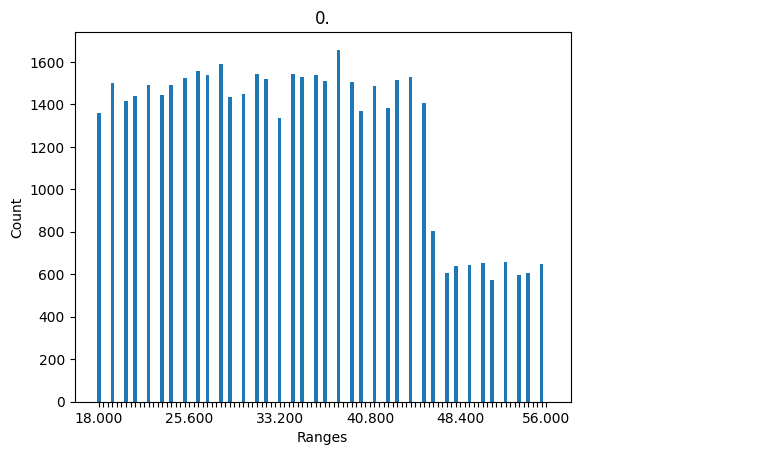

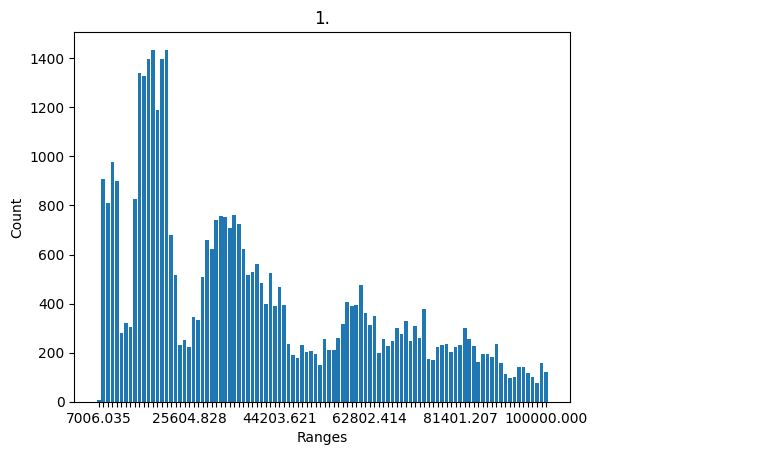

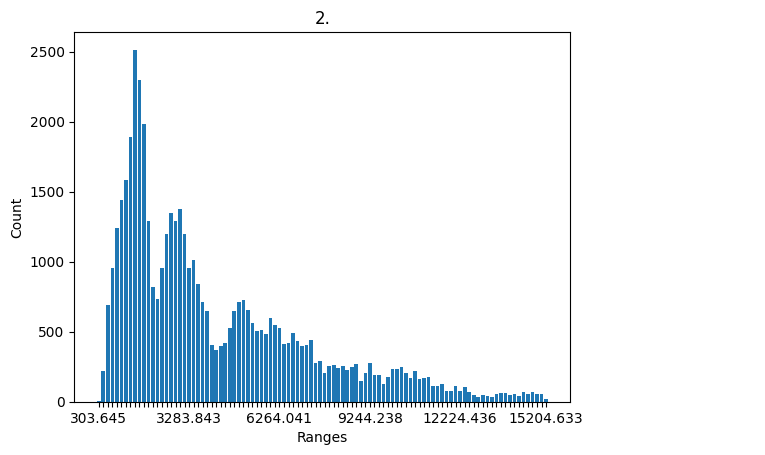

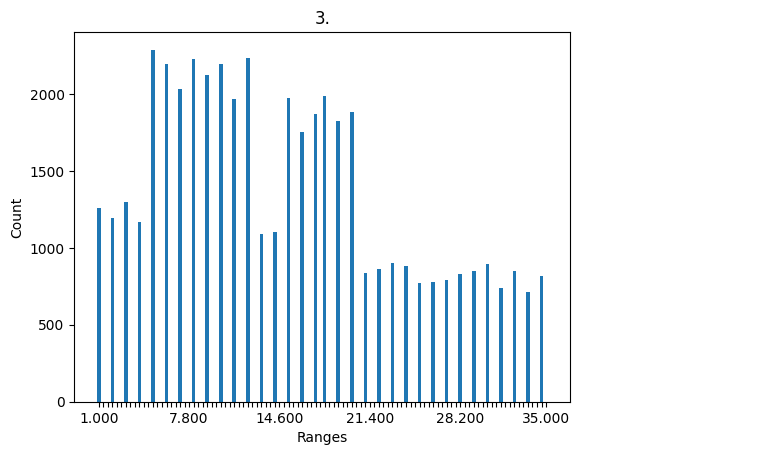

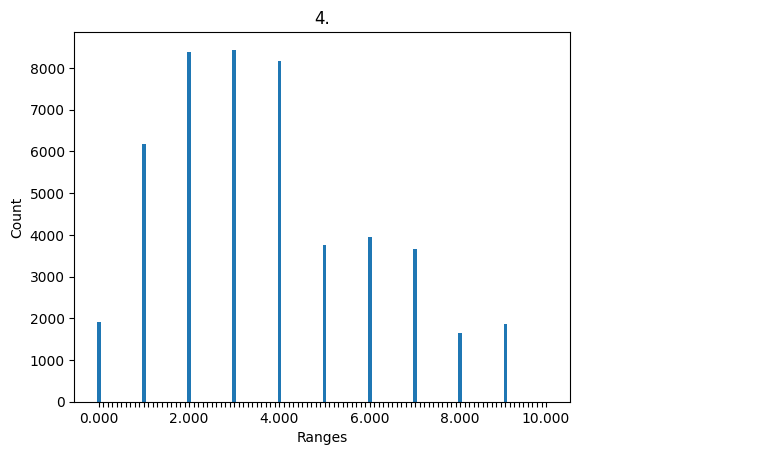

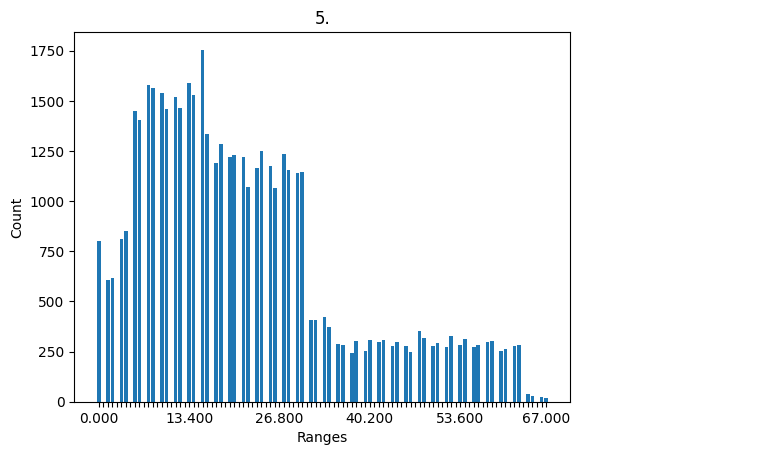

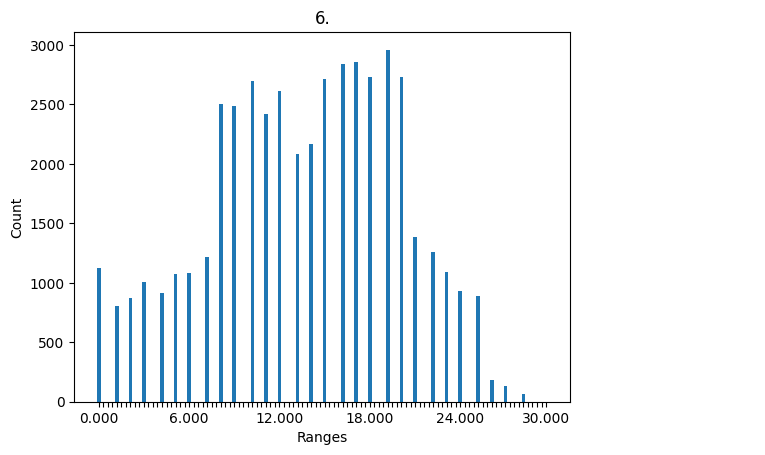

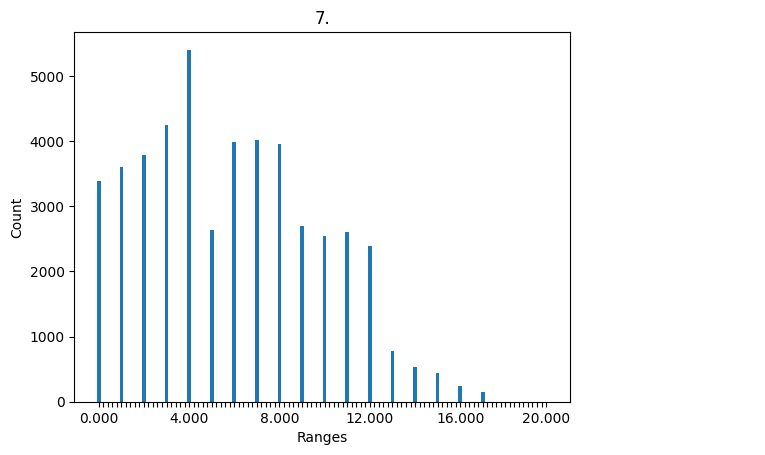

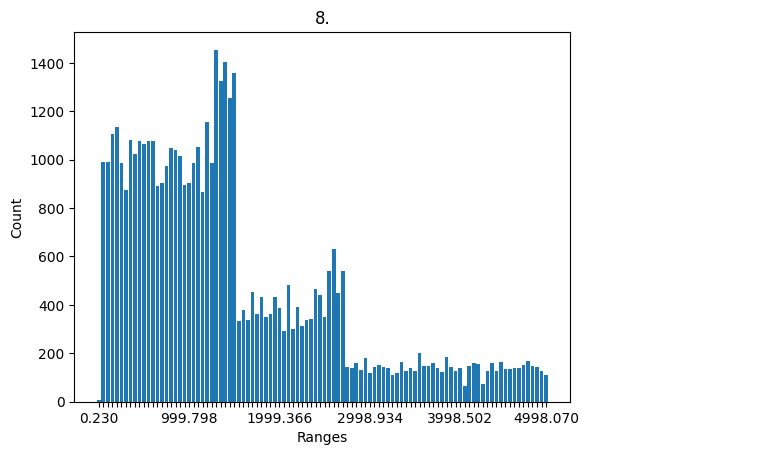

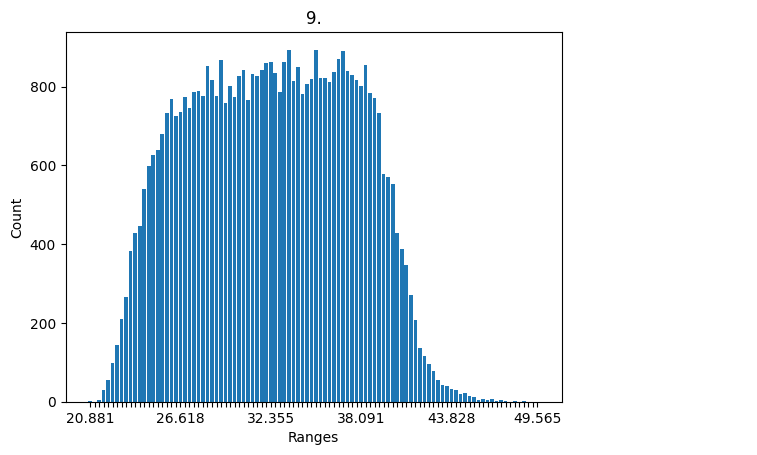

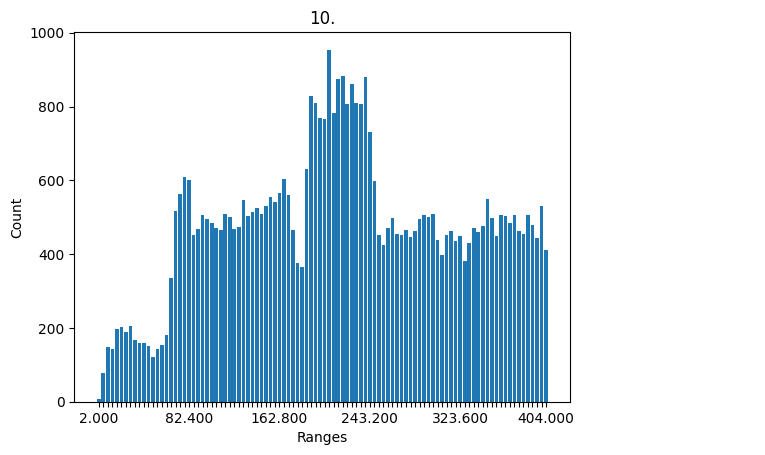

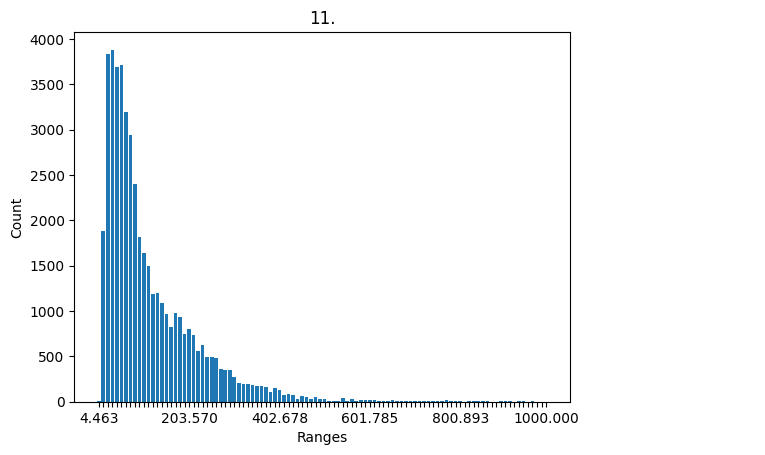

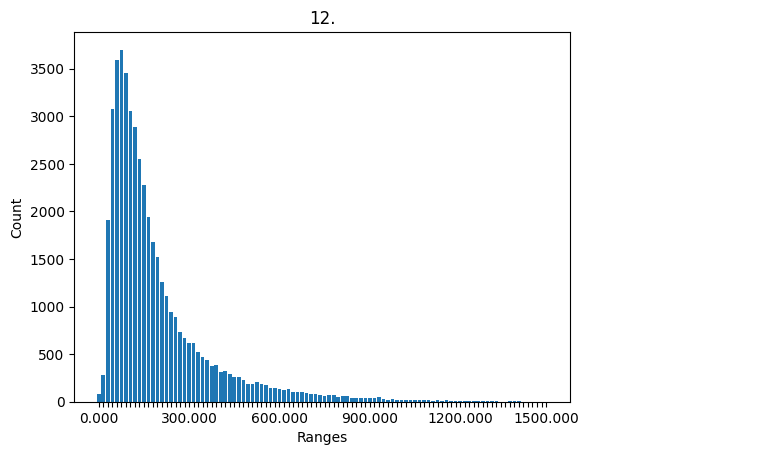

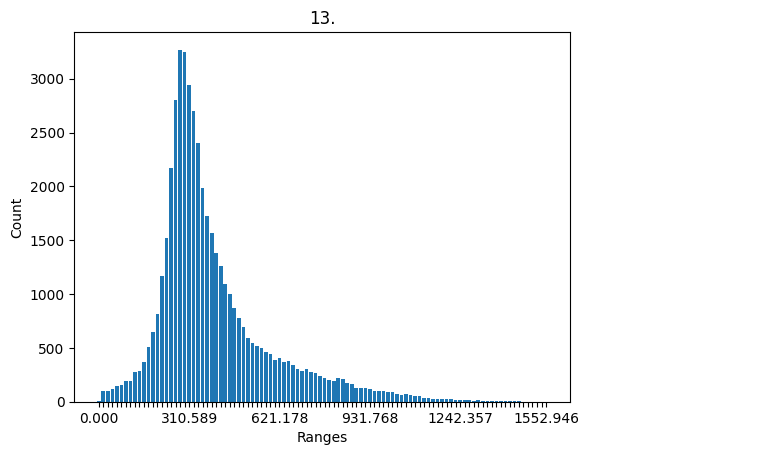

In [90]:
show_credit_score_data_scattering(100)

In [ ]:
############# CREDIT_SCORE PERCENTILES:
# Values to get converted to percentile:
# 1, 2, 8, 9, 10, 11, 12, 13

In [8]:
for k in [1,2,8,9,10,11,12,13]:
    aa = np.array(X2[:,k])
    bb = np.array(X2[:,k])
    for i in range(51):
        per = np.percentile(aa, 2*i)
        for j in range(aa.shape[0]):
            if aa[j] >= per:
                bb[j] = per
    X2[:,k] = bb

In [20]:
####### SAVING FILE
np.savetxt("../../data_processed/credit_score/percentiles/X.csv", X2,
              delimiter = ",", fmt="%s")
np.savetxt("../../data_processed/credit_score/percentiles/y.csv", y2,
              delimiter = ",", fmt="%s")

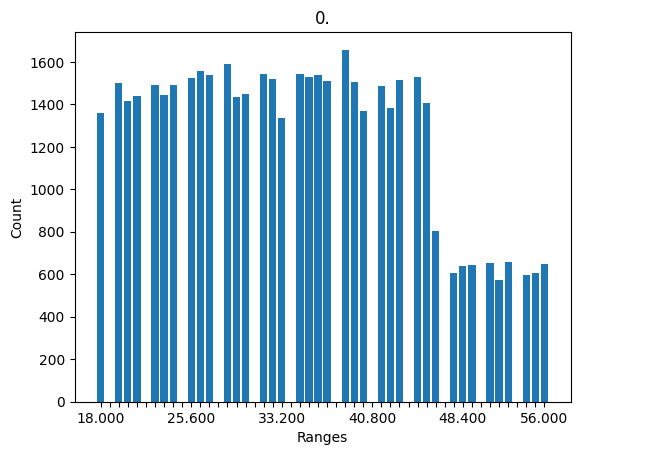

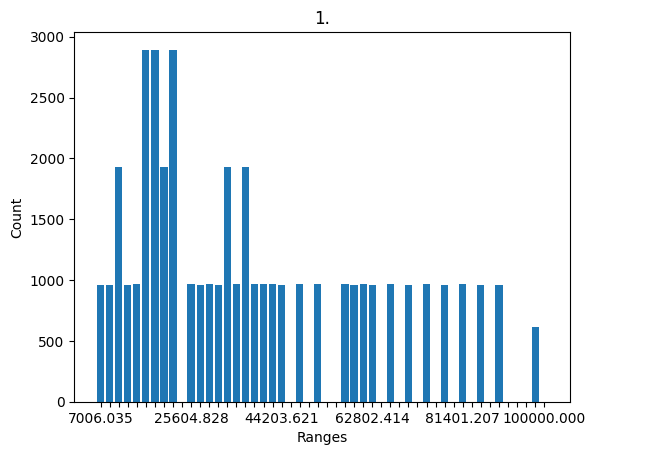

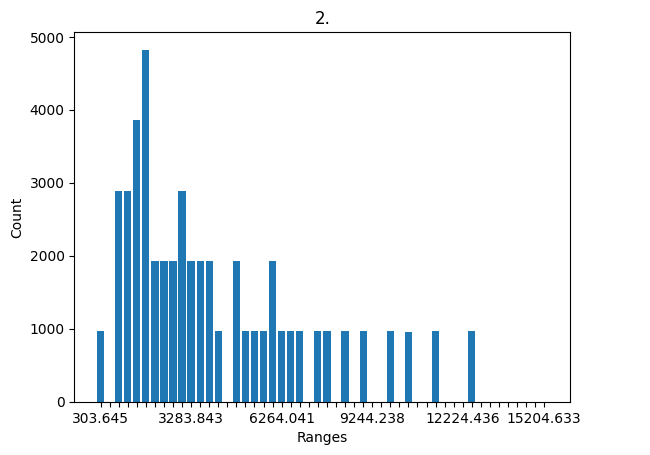

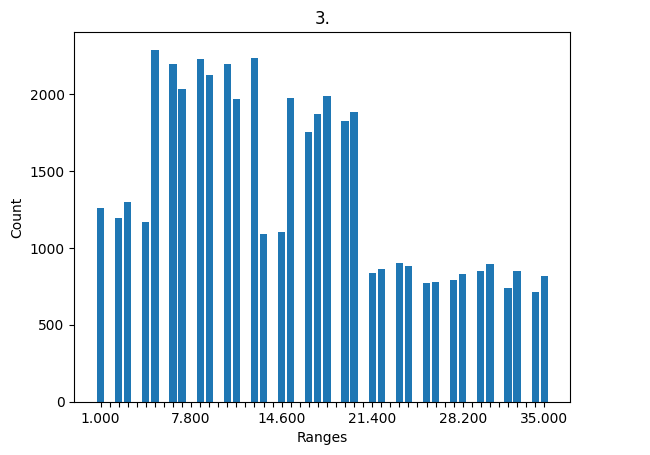

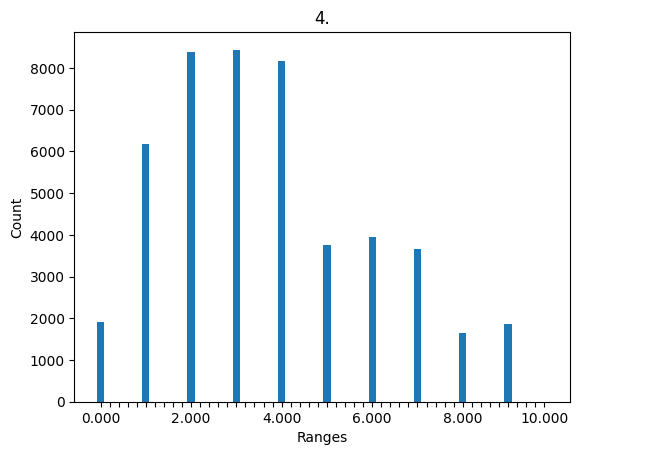

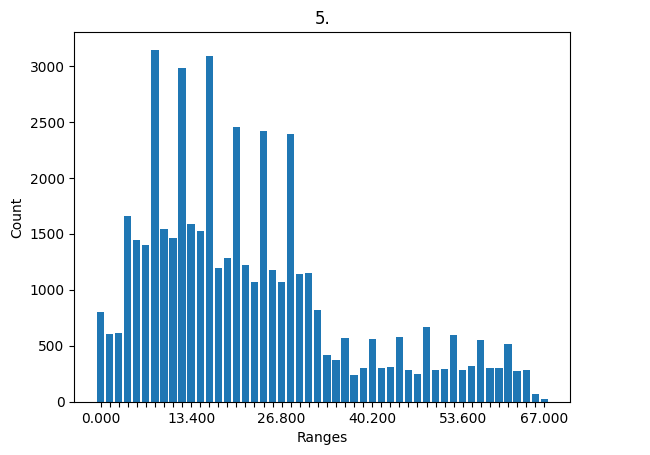

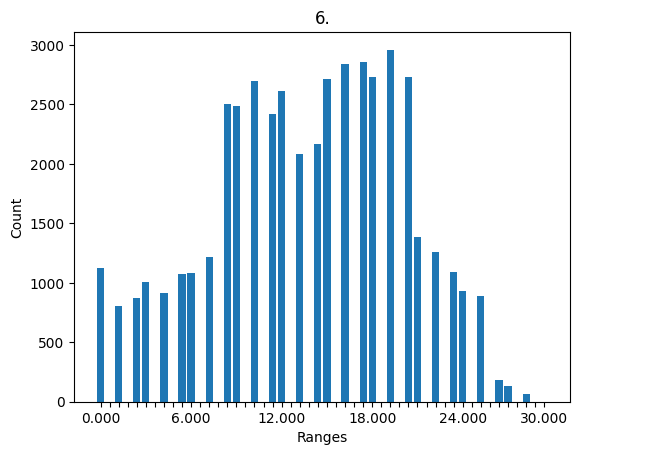

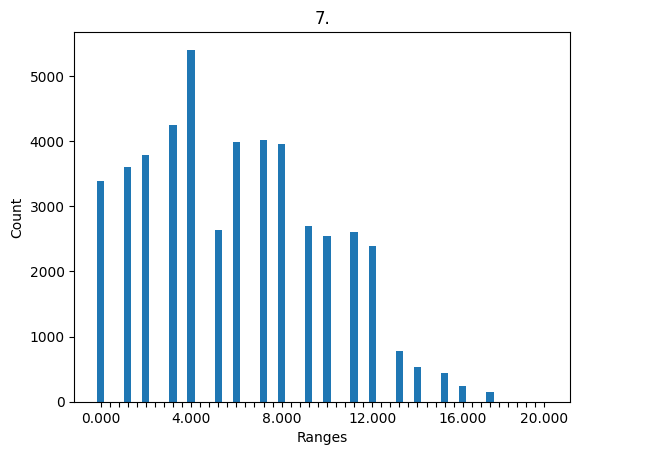

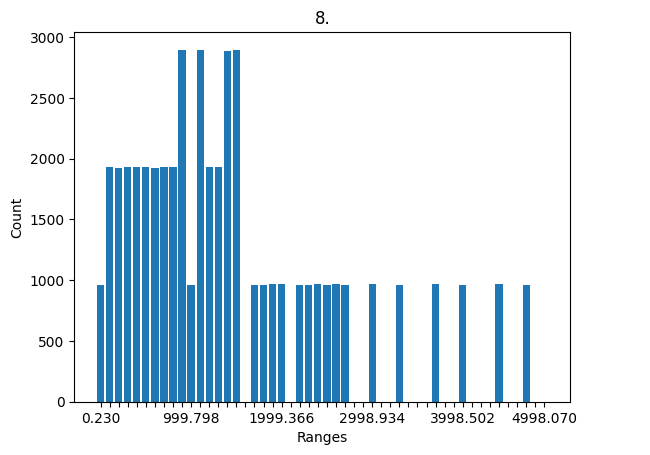

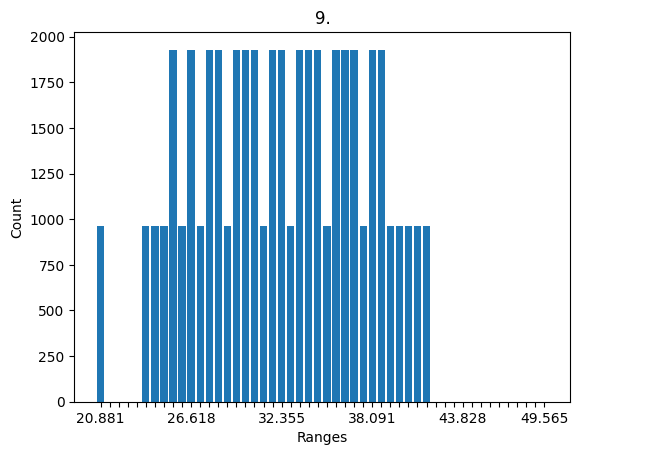

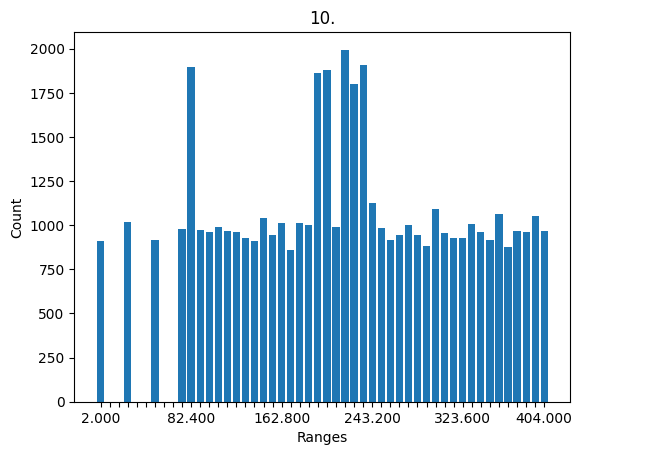

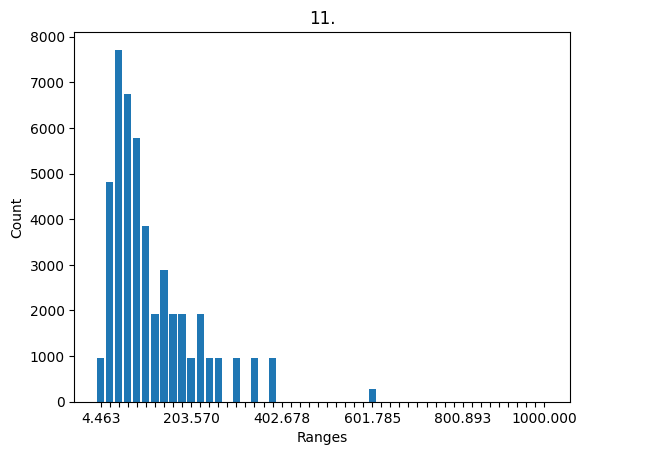

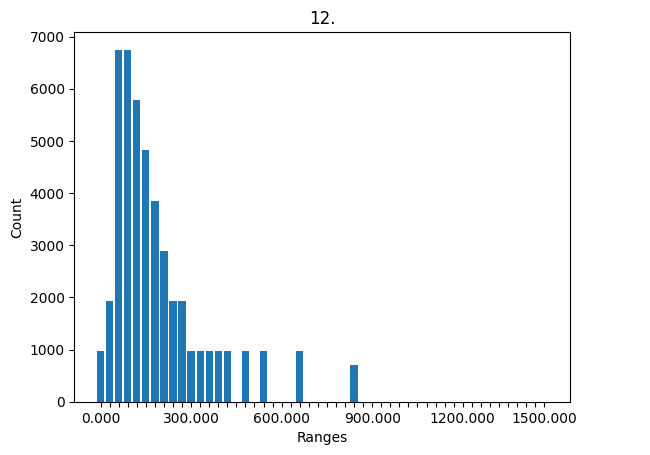

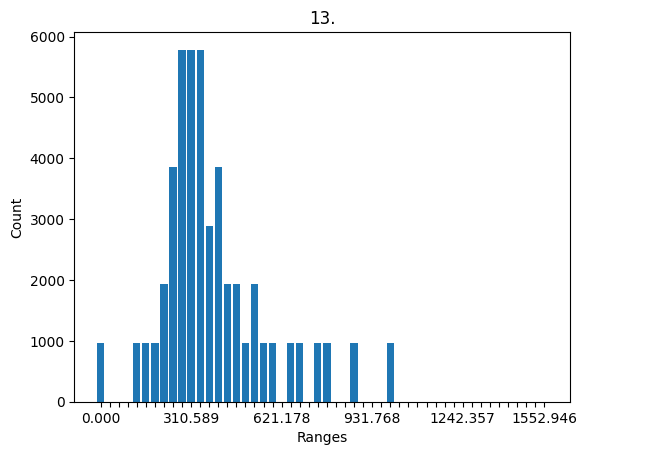

In [93]:
show_credit_score_data_scattering(50)

In [79]:
# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X3 = np.array(cdc_diabetes_health_indicators.data.features)
y3 = np.array(cdc_diabetes_health_indicators.data.targets)

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
# print(cdc_diabetes_health_indicators.variables)

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [80]:
X3_zer = np.zeros([218334, X3.shape[1]])
y3_zer = np.zeros([218334, 1])
X3_one = np.zeros([35346, X3.shape[1]])
y3_one = np.ones([35346, 1])
counter = 0
counter1 = 0
for row, clas in zip(X3, y3):
    if clas == 0:
        X3_zer[counter] = row
        counter += 1
    else:
        X3_one[counter1] = row
        counter1 += 1

indices = np.random.choice(218334, size=35346, replace=False)

X3_selection = np.zeros([70692, X3.shape[1]])
y3_selection = np.zeros([70692,1])

for i in range(70692):
    if i<35346:
        X3_selection[i,:] = X3_zer[indices[i],:]
        y3_selection[i,:] = y3_zer[indices[i],:]
    else:
        X3_selection[i,:] = X3_one[i-35346,:]
        y3_selection[i,:] = y3_one[i-35346,:]

In [83]:
####### SAVING FILE
np.savetxt("../data_processed/diabetes/X.csv", X3_selection,
              delimiter = ",", fmt="%s")
np.savetxt("../data_processed/diabetes/y.csv", y3_selection,
              delimiter = ",", fmt="%s")